<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.001457,42.068164,86.744186,0.730108,227.543916,226.775690,0.768226
1,0.0,1.0,32.468207,68.509050,88.230753,1.632376,200.840387,199.261760,1.578627
2,0.0,2.0,92.914756,38.108065,38.471231,-0.048523,179.445530,179.340335,0.105195
3,0.0,3.0,71.190212,40.379026,64.371622,-0.015694,185.925167,185.874362,0.050805
4,0.0,4.0,55.436400,34.440822,94.547367,-0.124391,194.300198,194.442093,-0.141895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.049733,57.722371,33.992889,0.530284,199.295276,198.652656,0.642620
249996,999.0,246.0,82.849004,31.140243,35.791249,-1.011109,158.769387,159.709181,-0.939794
249997,999.0,247.0,40.297513,42.231566,99.136035,1.447301,193.112415,191.700484,1.411931
249998,999.0,248.0,54.861676,45.725690,48.847697,-0.531857,158.903206,159.428339,-0.525133


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.001457  42.068164  86.744186  0.730108  227.543916   
      1.0    32.468207  68.509050  88.230753  1.632376  200.840387   
      2.0    92.914756  38.108065  38.471231 -0.048523  179.445530   
      3.0    71.190212  40.379026  64.371622 -0.015694  185.925167   
      4.0    55.436400  34.440822  94.547367 -0.124391  194.300198   
...                ...        ...        ...       ...         ...   
999.0 245.0  97.049733  57.722371  33.992889  0.530284  199.295276   
      246.0  82.849004  31.140243  35.791249 -1.011109  158.769387   
      247.0  40.297513  42.231566  99.136035  1.447301  193.112415   
      248.0  54.861676  45.725690  48.847697 -0.531857  158.903206   
      249.0  49.401116  90.356966  86.295970 -0.649994  235.404058   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.775690  0.768226  
      1.0    199.261760  1.578627  
      2.0    179.340335  0.105195  
      3.0    185.874362  0.050805  
      4.0    194.442093 -0.141895  
...                 ...       ...  
999.0 245.0  198.652656  0.642620  
      246.0  159.709181 -0.939794  
      247.0  191.700484  1.411931  
      248.0  159.428339 -0.525133  
      249.0  236.053510 -0.649452  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.001457  42.068164  86.744186  0.730108  227.543916   
      1.0    32.468207  68.509050  88.230753  1.632376  200.840387   
      2.0    92.914756  38.108065  38.471231 -0.048523  179.445530   
      3.0    71.190212  40.379026  64.371622 -0.015694  185.925167   
      4.0    55.436400  34.440822  94.547367 -0.124391  194.300198   
...                ...        ...        ...       ...         ...   
999.0 245.0  97.049733  57.722371  33.992889  0.530284  199.295276   
      246.0  82.849004  31.140243  35.791249 -1.011109  158.769387   
      247.0  40.297513  42.231566  99.136035  1.447301  193.112415   
      248.0  54.861676  45.725690  48.847697 -0.531857  158.903206   
      249.0  49.401116  90.356966  86.295970 -0.649994  235.404058   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.775690  0.768226  
      1.0    199.261760  1.578627  
      2.0    179.340335  0.105195  
      3.0    185.874362  0.050805  
      4.0    194.442093 -0.141895  
...                 ...       ...  
999.0 245.0  198.652656  0.642620  
      246.0  159.709181 -0.939794  
      247.0  191.700484  1.411931  
      248.0  159.428339 -0.525133  
      249.0  236.053510 -0.649452  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.001457,42.068164,86.744186,0.730108,227.543916,226.775690,0.768226
1,0.0,1.0,32.468207,68.509050,88.230753,1.632376,200.840387,199.261760,1.578627
2,0.0,2.0,92.914756,38.108065,38.471231,-0.048523,179.445530,179.340335,0.105195
3,0.0,3.0,71.190212,40.379026,64.371622,-0.015694,185.925167,185.874362,0.050805
4,0.0,4.0,55.436400,34.440822,94.547367,-0.124391,194.300198,194.442093,-0.141895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.049733,57.722371,33.992889,0.530284,199.295276,198.652656,0.642620
249996,999.0,246.0,82.849004,31.140243,35.791249,-1.011109,158.769387,159.709181,-0.939794
249997,999.0,247.0,40.297513,42.231566,99.136035,1.447301,193.112415,191.700484,1.411931
249998,999.0,248.0,54.861676,45.725690,48.847697,-0.531857,158.903206,159.428339,-0.525133


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.001457  42.068164  86.744186  0.730108  227.543916   
      1.0    32.468207  68.509050  88.230753  1.632376  200.840387   
      2.0    92.914756  38.108065  38.471231 -0.048523  179.445530   
      3.0    71.190212  40.379026  64.371622 -0.015694  185.925167   
      4.0    55.436400  34.440822  94.547367 -0.124391  194.300198   
...                ...        ...        ...       ...         ...   
999.0 245.0  97.049733  57.722371  33.992889  0.530284  199.295276   
      246.0  82.849004  31.140243  35.791249 -1.011109  158.769387   
      247.0  40.297513  42.231566  99.136035  1.447301  193.112415   
      248.0  54.861676  45.725690  48.847697 -0.531857  158.903206   
      249.0  49.401116  90.356966  86.295970 -0.649994  235.404058   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.775690  0.768226  
      1.0    199.261760  1.578627  
      2.0    179.340335  0.105195  
      3.0    185.874362  0.050805  
      4.0    194.442093 -0.141895  
...                 ...       ...  
999.0 245.0  198.652656  0.642620  
      246.0  159.709181 -0.939794  
      247.0  191.700484  1.411931  
      248.0  159.428339 -0.525133  
      249.0  236.053510 -0.649452  

[250000 rows x 7 columns]

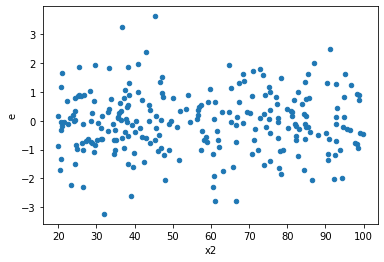

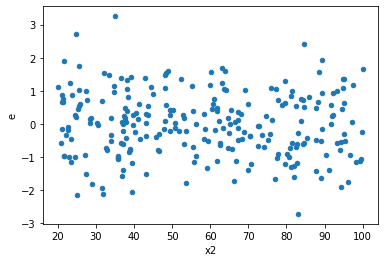

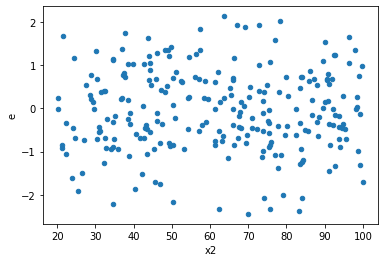

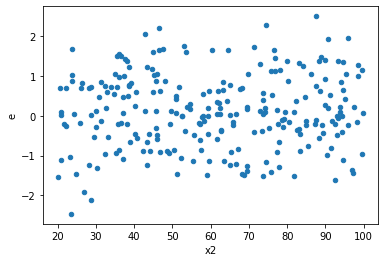

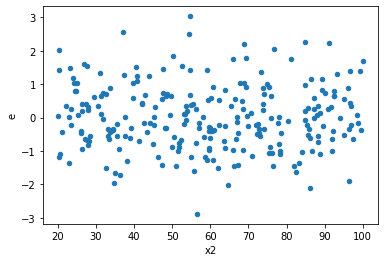

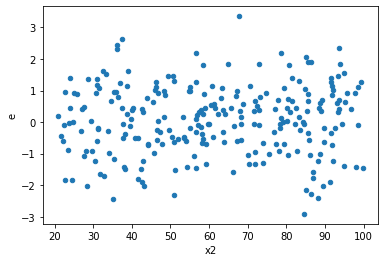

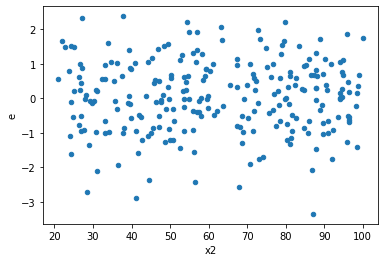

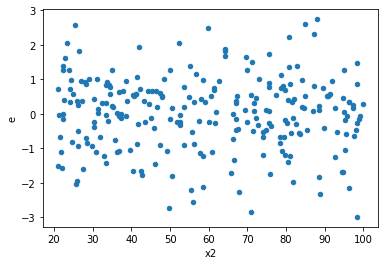

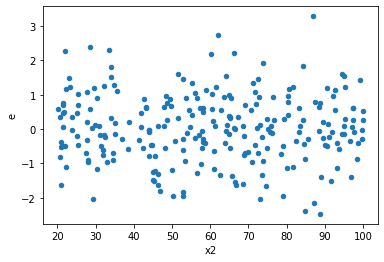

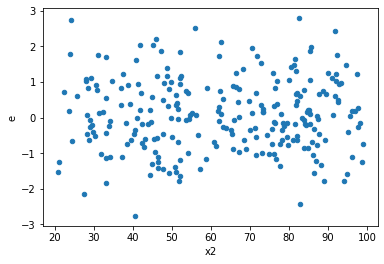

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,132.0,112.0,111.8314279029981,115.44034183016574,0.847207787143925,1.0307173377693368,1.2166051273490444,0.2854067652713912,0.8572966173643044,0.1427033826356956,Reject005=1 : Homoscedasticity
3.0,124.0,120.0,101.51383949930876,103.71818802278555,0.8186599959621674,0.8643182335232129,1.0557719172626525,0.7656874021322606,0.6171562989338697,0.3828437010661303,Reject005=1 : Homoscedasticity
11.0,137.0,107.0,120.57275724060825,116.13672555599278,0.8800931185445858,1.0853899584672222,1.233267180025378,0.25705986815818926,0.8714700659209054,0.12852993407909463,Reject005=1 : Homoscedasticity
18.0,100.0,144.0,93.86827673567326,167.20654562287743,0.9386827673567326,1.1611565668255377,1.2370063744701272,0.24183834837010143,0.8790808258149493,0.12091917418505072,Reject005=1 : Homoscedasticity
19.0,136.0,108.0,161.0779590088908,131.44354642017953,1.1843967574183145,1.2170698742609216,1.0275862937296674,0.8871384600173307,0.5564307699913347,0.4435692300086653,Reject005=1 : Homoscedasticity
20.0,116.0,128.0,105.73945662328782,132.21014048454634,0.9115470398559296,1.0328917225355183,1.1331194961685875,0.48931231452549717,0.7553438427372514,0.24465615726274859,Reject005=1 : Homoscedasticity
21.0,131.0,113.0,118.93971520398563,109.04812437392862,0.907936757282333,0.965027649326802,1.062879811381748,0.7410746252304454,0.6294626873847773,0.3705373126152227,Reject005=1 : Homoscedasticity
23.0,120.0,124.0,109.73128654151736,113.64366272034626,0.914427387845978,0.9164811509705343,1.0022459553944398,0.9893456595066827,0.5053271702466586,0.49467282975334137,Reject005=1 : Homoscedasticity
24.0,129.0,115.0,107.82125524585207,98.16905564344074,0.8358236840763726,0.853643962116876,1.0213206186663586,0.9103624428029069,0.5448187785985465,0.45518122140145345,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,127.0,117.0,151.87897644348385,128.12201412613499,1.1958974523108965,1.0950599497960256,0.9156804771847141,0.6257137796119553,Reject005=1 : Homoscedasticity
1.0,132.0,112.0,111.8314279029981,115.44034183016574,0.847207787143925,1.0307173377693368,1.2166051273490444,0.2854067652713912,Reject005=1 : Homoscedasticity
2.0,136.0,108.0,121.15276571919772,89.82066419658419,0.8908291596999832,0.8316728166350388,0.9335940652359569,0.701246216814462,Reject005=1 : Homoscedasticity
3.0,124.0,120.0,101.51383949930876,103.71818802278555,0.8186599959621674,0.8643182335232129,1.0557719172626525,0.7656874021322606,Reject005=1 : Homoscedasticity
4.0,134.0,110.0,122.83839035128061,96.44926420341072,0.9167044056065717,0.8768114927582793,0.9564822503259425,0.8024577236002914,Reject005=1 : Homoscedasticity
5.0,113.0,131.0,135.85717845170126,154.8398753172558,1.202275915501781,1.1819837810477543,0.9831218988982594,0.9290269911925864,Reject005=1 : Homoscedasticity
6.0,116.0,128.0,129.64924770792837,135.36561205015587,1.117665928516624,1.0575438441418428,0.9462074642871365,0.7632309163135508,Reject005=1 : Homoscedasticity
7.0,117.0,127.0,138.02805471597821,126.16221377899664,1.1797269633844292,0.9934032581023358,0.8420620100539505,0.34596136686238954,Reject005=1 : Homoscedasticity
8.0,133.0,111.0,131.54570240344532,97.03012593500907,0.989065431604852,0.8741452786937753,0.883809352507035,0.4936785650011941,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      963
Reject005=0 : Heteroscedasticity     37
Name: Result_test, dtype: int64